# Служебные пакеты и функции

In [28]:
!pip3 install -r requirements.txt
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score,fbeta_score,classification_report
from sklearn.neighbors import KNeighborsClassifier
 
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

font = {'size' : 15}

plt.rc('font', **font)

def get_class_colour (class_label):
    return 'red' if class_label else 'blue'

def plot_blobs (X, y, add_blobs=None, add_predicted_blobs=None, nearest_points=None):
    plt.figure(figsize= (6, 6))
    plt.scatter(X[:, 0], X[:, 1], c=[get_class_colour (y_i) for y_i in y], s=100, edgecolor= 'black', alpha=0.3)
    if add_blobs is not None:
        plt.scatter(add_blobs[:, 0], add_blobs[:, 1], c='green', s=100, edgecolor='black' )
    if add_predicted_blobs is not None:
        plt.scatter(add_blobs[:, 0], add_blobs[:, 1], c=[get_class_colour (y_i) for y_i in add_predicted_blobs], s=100, edgecolor='black')
    #if nearest_points is not None:
    #    plt.scatter(nearest_points[:, 0], nearest_points[:, 1], c='red', s=100, edgecolor='black')
    plt.title("Blobs") 
    plt.xlabel("feature_1")
    plt.ylabel ("feature_2")


def plot_predictions(k):
    cmap_light = ListedColormap(['cornflowerblue','pink',])
    cmap_bold = ListedColormap(['darkblue','red'])
    h = .02
    plt.rcParams["figure.autolayout"] = True
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X, y)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h))
    x_pred=np.c_[xx.ravel(), yy.ravel()]
    Z = clf.predict(x_pred)
    Z = Z.reshape(xx.shape)
    plt.figure(1, figsize= (6, 4))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    plt.scatter(x=X[:, 0], y=X[:, 1], c=y, edgecolors='c', alpha=0.5, edgecolor="white", cmap=cmap_bold,linewidths=2)


    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f"Binary classification (k = {k} Neighbors)")
    plt.show ()

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


# 1. KNN

## Intro

In [29]:
X, y = datasets.make_blobs(n_samples=100, random_state=0, centers=2, cluster_std=1.5)
X[:3] , y[:3]

(array([[ 5.30012145,  2.90245558],
        [ 0.33406454,  0.24093359],
        [-0.90292296,  5.47002286]]),
 array([1, 1, 0]))

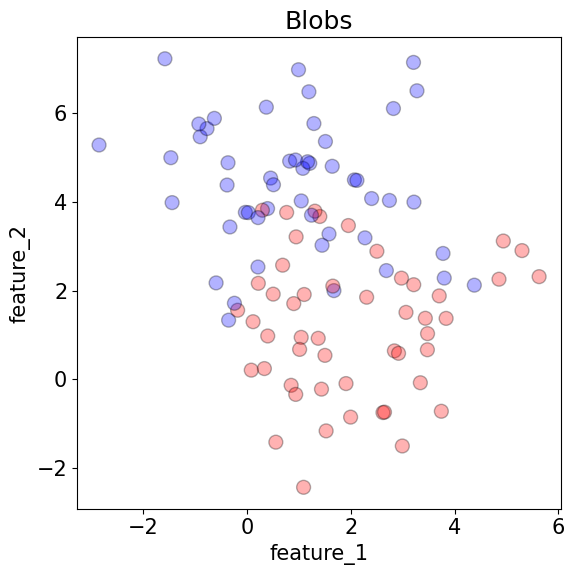

In [30]:
#Нолики - СИНИЕ, Единички - КРАСНЫЕ
plot_blobs(X,y)

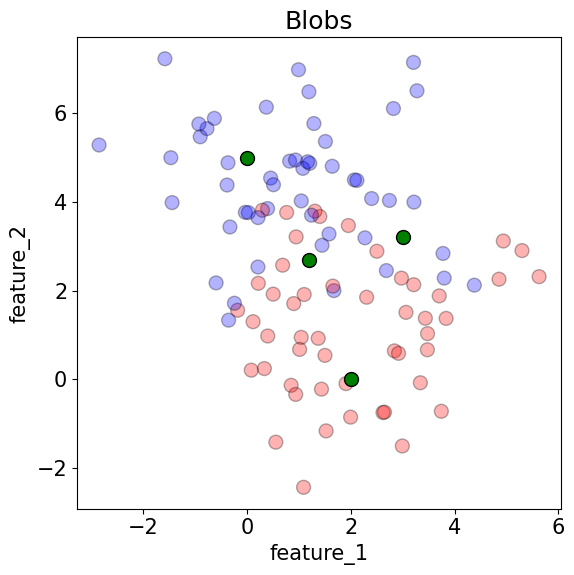

In [31]:
X_new=np.array([[2,0],[0,5],[1.2,2.7],[3,3.2]])
plot_blobs(X,y, X_new)

In [32]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X,y)
preds=knn.predict(X_new)
plot_blobs(X,y, X_new,preds)
plt.title(f"num_neighbors = {1}")

## Parameter tuning

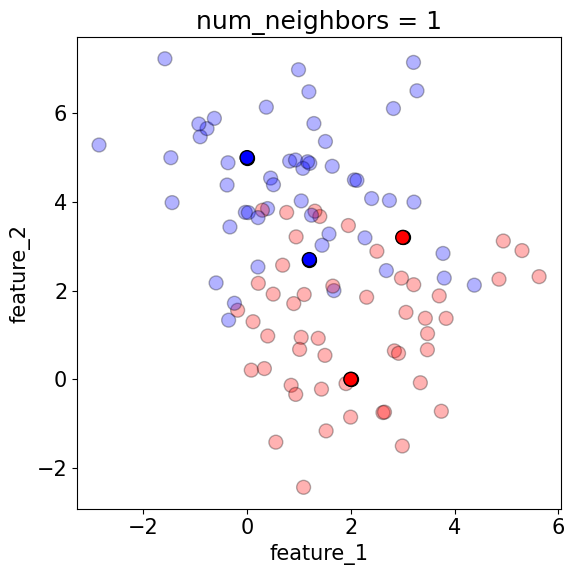

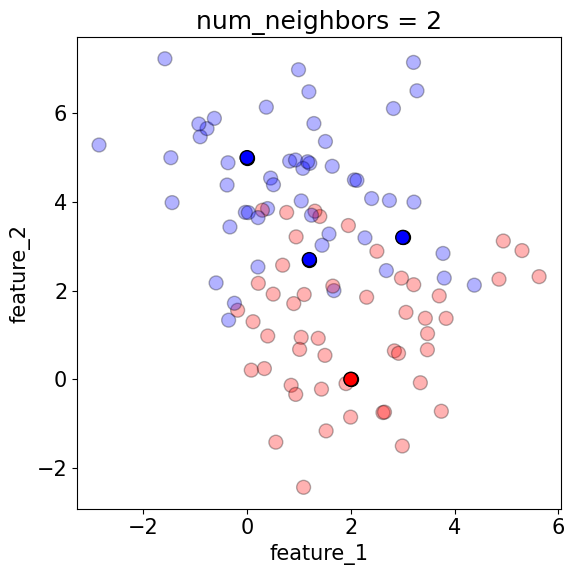

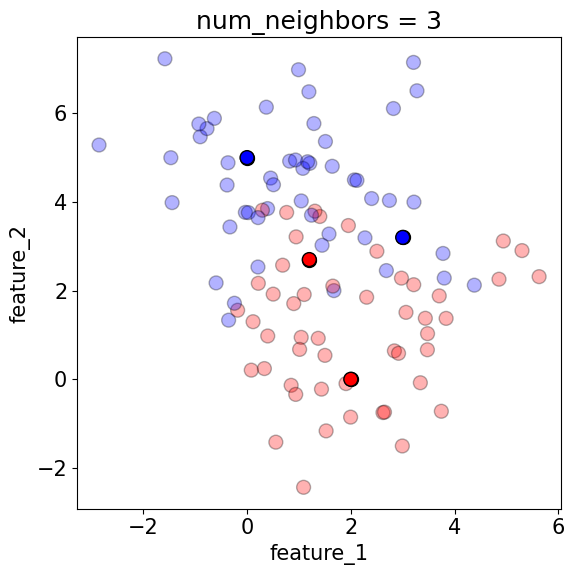

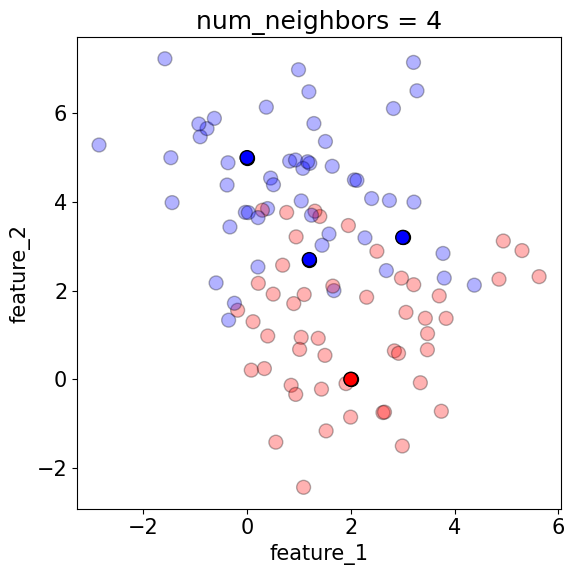

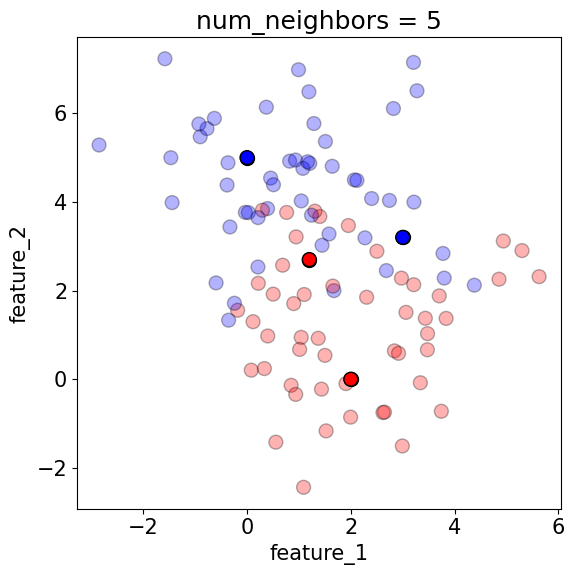

In [33]:
for i in range(2,6):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X,y)
    preds=knn.predict(X_new)
    plot_blobs(X,y, X_new,preds)
    plt.title(f"num_neighbors = {i}")

## Что происходит с разделительной способностью с увеличением числа соседей?

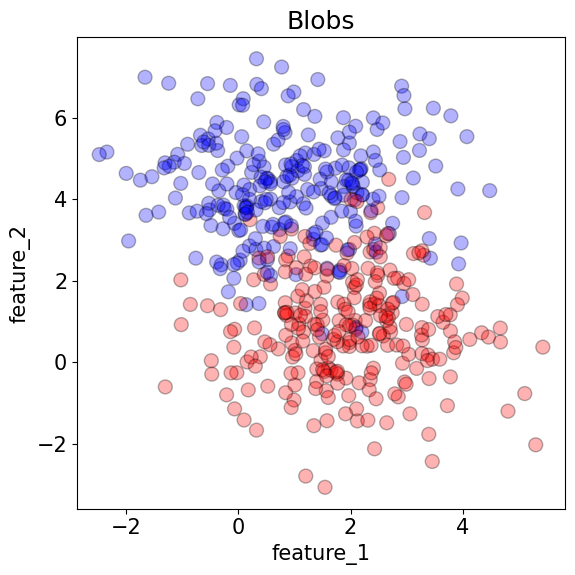

In [36]:
X, y = datasets.make_blobs(n_samples=500, random_state=0, centers=2, cluster_std=1.3)
plot_blobs(X,y)

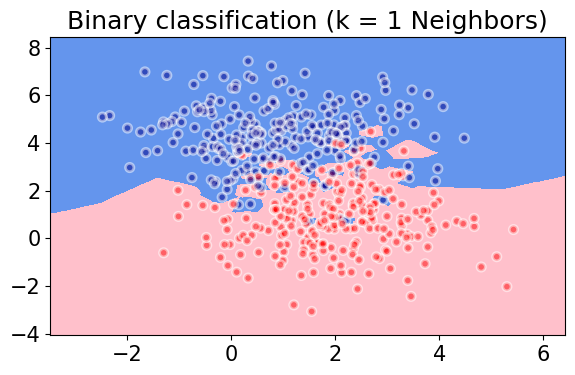

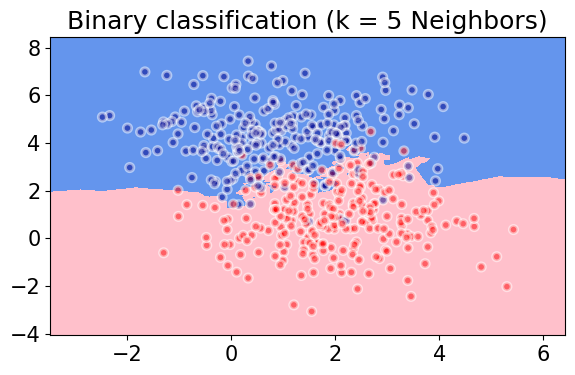

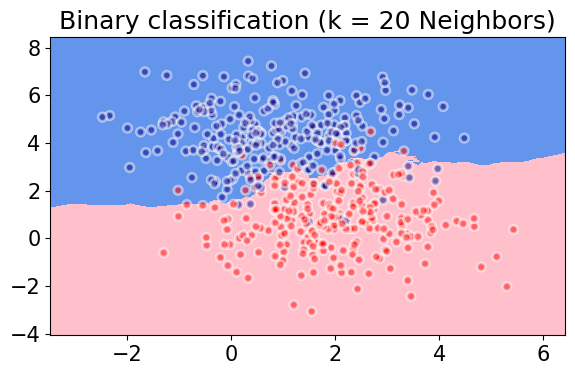

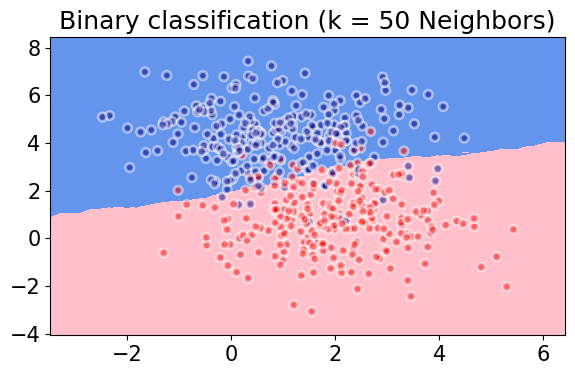

In [37]:
for i in [1,5,20,50]:
    plot_predictions(i)

## Качество классификации в зависимости от параметра k

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100) 
print("train shape: {}  \ntest shape: {}".format(X_train.shape, X_test.shape))

train shape: (350, 2)  
test shape: (150, 2)


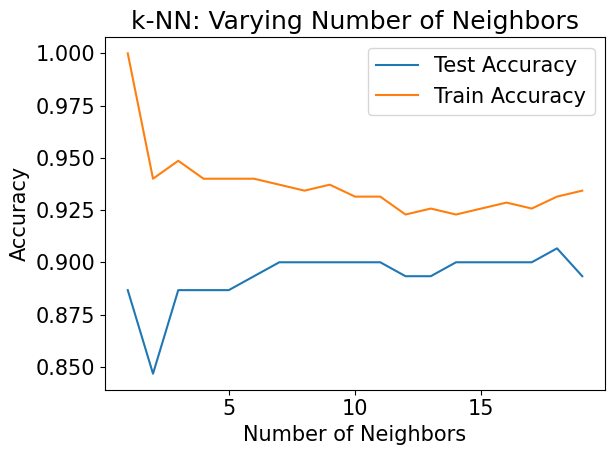

Max test accuracy:  0.9066666666666666 best_K:  18


In [39]:
max_neighbors=20
num_neighbors = np.arange(1, max_neighbors)
train_accuracy = []
test_accuracy = []

for i, k in enumerate(num_neighbors):
    
    knn = KNeighborsClassifier(n_neighbors=k)
    
    knn.fit(X_train,y_train)
    preds_train=knn.predict(X_train)
    preds=knn.predict(X_test)
    
    train_accuracy.append(accuracy_score(y_train, preds_train))
    test_accuracy.append(accuracy_score(y_test, preds))



plt.title('k-NN: Varying Number of Neighbors')
plt.plot(num_neighbors, test_accuracy, label = 'Test Accuracy')
plt.plot(num_neighbors, train_accuracy, label = 'Train Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()
print("Max test accuracy: ", max(test_accuracy), "best_K: ", np.argmax(test_accuracy)+1)

In [40]:
knn = KNeighborsClassifier(n_neighbors=18)
knn.fit(X_train,y_train)
preds=knn.predict(X_test)

# 2. Метрики

In [41]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score,fbeta_score,classification_report

In [42]:
predictions = pd.DataFrame(np.column_stack([y_test, preds]), 
                               columns=['actual', 'predicted'])

print(predictions.shape)
predictions.head()

(150, 2)


,actual,predicted
0,1,1
1,0,1
2,1,1
3,0,0
4,0,0


### Инструмент Confusion matrix

<img src="Confusion%20Matrix%20Common.png" alt="Drawing" style="width: 300px;"/>

Confusion matrix, without normalization
[[69  6]
 [ 8 67]]


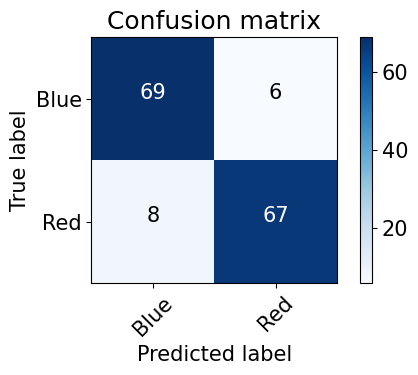

In [43]:
cnf_matrix=confusion_matrix(predictions.actual,predictions.predicted)
plt.figure(figsize=(5, 4))
plot_confusion_matrix(cnf_matrix, classes=['Blue','Red'],
                      title='Confusion matrix')

## Accuracy

![Alt text](accuracy.svg)


In [44]:
accuracy_score(predictions.actual,predictions.predicted)

0.9066666666666666

## Recall

![Alt text](recall.svg)

In [45]:
recall_score(predictions.actual,predictions.predicted)

0.8933333333333333

## Precision

![Alt text](precision.svg)

In [46]:
precision_score(predictions.actual,predictions.predicted)

0.9178082191780822

## F-score

![Alt text](f_score.svg)

In [47]:
f1_score(predictions.actual,predictions.predicted)

0.9054054054054055

In [48]:
fbeta_score(predictions.actual,predictions.predicted, beta=1)

0.9054054054054055

In [49]:
fbeta_score(predictions.actual,predictions.predicted, beta=0.0001)

0.9178082189266279

In [50]:
fbeta_score(predictions.actual,predictions.predicted, beta=10000)

0.8933333335715555

## Classification Report

In [51]:
report=classification_report(predictions.actual,predictions.predicted, target_names=['Non-Spam', 'Spam'])
print(report)

              precision    recall  f1-score   support

    Non-Spam       0.90      0.92      0.91        75
        Spam       0.92      0.89      0.91        75

    accuracy                           0.91       150
   macro avg       0.91      0.91      0.91       150
weighted avg       0.91      0.91      0.91       150

